<a href="https://colab.research.google.com/github/aniusoro/Uni/blob/main/Homework11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:

In [1]:
survive <- as.data.frame(apply(Titanic, c(2, 4), sum))
survive

,No,Yes
,<dbl>,<dbl>
Male,1364,367
Female,126,344


In [2]:
A = c(1171.826, 318.174, 1490)
B = c(559.174, 151.827, 711)
C = c(1731, 470, 2201)
Expected = data.frame(A, B, C)
rownames(Expected) = c("Male", "Female", "Total")
colnames(Expected) = c("No", "Yes", "Total")
Expected

,No,Yes,Total
,<dbl>,<dbl>,<dbl>
Male,1171.826,559.174,1731
Female,318.174,151.827,470
Total,1490.000,711.000,2201


In [3]:
Xsquared = (((1364 - 1171.826)^2)/1171.826)+
(((126 - 318.174)^2)/318.174) +
(((367 - 559.174)^2)/559.174)+
(((344 - 151.827)^2)/151.827)
round(Xsquared, 3)

df = (2-1) * (2 - 1)
df

pval = pchisq(Xsquared, df = 1, lower.tail = FALSE)
pval

[1] 456.873

[1] 1

[1] 2.303908e-101

I reject the null hypothesis and there is no evidence of dependence.

Question 2:

In [4]:
# chances of surviving if you are a male
q2odd = 367 / 1364
round(q2odd, 3)

[1] 0.269

Question 3:

In [5]:
q3odd = 344 / 126
round(q3odd, 3)

[1] 2.73

Question 4:

In [6]:
q4oddratio = q2odd / q3odd
q4oddratio

[1] 0.09855163

this means that you have a better chance of surviving if you are a male.

Question 5:

In [7]:
Gender = c("Male", "Male", "Female", "Female")
Survived = c("Yes", "No", "Yes", "No")
Percent = c(367/1731*100, 1364/1731*100, 344/470*100, 126/470*100)
plotdata = data.frame(Gender, Survived, Percent)
plotdata

Gender,Survived,Percent
<chr>,<chr>,<dbl>
Male,Yes,21.20162
Male,No,78.79838
Female,Yes,73.19149
Female,No,26.80851


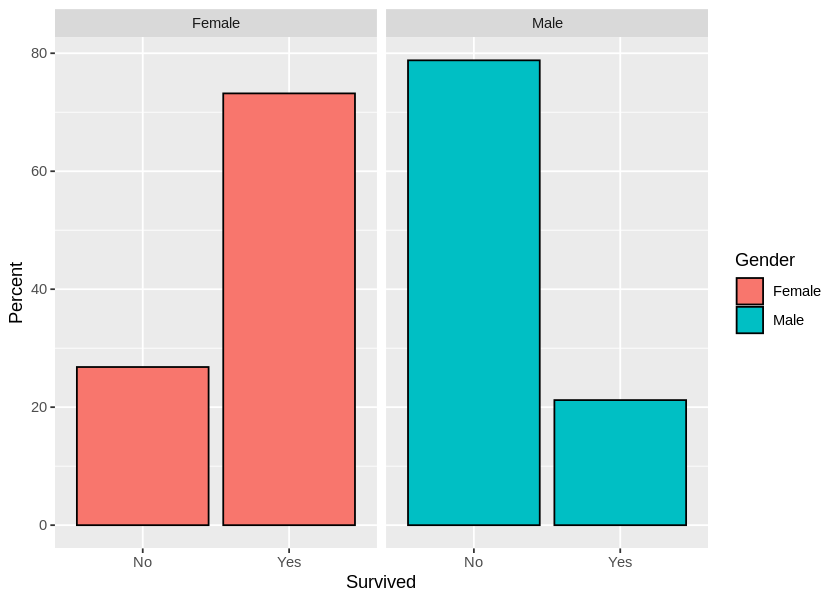

In [8]:
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 5)

ggplot(plotdata, aes(x = Survived, y = Percent)) +
  geom_bar(stat = "identity", colour = "black", aes(fill = Gender)) +
  facet_wrap(~ Gender)

Question 6:

In [9]:
students = as.data.frame.matrix(margin.table(HairEyeColor, c(1, 2)))
students = students[, c(1:2)]
students


,Brown,Blue
,<dbl>,<dbl>
Black,68,20
Brown,119,84
Red,26,17
Blond,7,94


In [10]:
A2 = c(44.506, 102.667, 21.747, 51.080)
B2 = c(43.494, 100.333, 21.253, 49.920)
studentExpected = data.frame(A2, B2)
rownames(studentExpected) = c("Black", "Brown", "Red", "Blonde")
colnames(studentExpected) = c("Brown", "Blue")
studentExpected

,Brown,Blue
,<dbl>,<dbl>
Black,44.506,43.494
Brown,102.667,100.333
Red,21.747,21.253
Blonde,51.080,49.920


In [11]:
Xsquared2 = (((68 - 44.506)^2)/44.506)+
(((20 - 43.494)^2)/43.494) +
(((119 - 102.667)^2)/102.667)+
(((84 - 100.333)^2)/100.333) + 
(((26 - 21.747)^2)/21.747) + 
(((17 - 21.253)^2)/21.253) + 
(((7 - 51.080)^2)/51.080) + 
(((94 - 49.920)^2)/49.920)
round(Xsquared2, 3)

df2 = (4-1) * (2 - 1)
df2

pval = pchisq(Xsquared2, df = 3, lower.tail = FALSE)
pval

[1] 108.995

[1] 3

[1] 1.805312e-23

we reject the null, so there is no independence.

Question 7:

In [12]:
HairBr = c("Black", "Brown", "Red", "Blonde")
EyesBr = c("Brown","Brown", "Brown", "Brown")
PercentBr = c(68/220*100, 119/220*100, 26/220*100, 7/220*100)
plotdataBr = data.frame(HairBr, EyesBr, PercentBr)
plotdataBr

HairBl = c("Black", "Brown", "Red", "Blonde")
EyesBl = c("Blue","Blue", "Blue", "Blue")
PercentBl = c(20/215*100, 84/215*100, 17/215*100, 94/215*100)
plotdataBl = data.frame(HairBl, EyesBl, PercentBl)
plotdataBl

HairBr,EyesBr,PercentBr
<chr>,<chr>,<dbl>
Black,Brown,30.909091
Brown,Brown,54.090909
Red,Brown,11.818182
Blonde,Brown,3.181818


HairBl,EyesBl,PercentBl
<chr>,<chr>,<dbl>
Black,Blue,9.302326
Brown,Blue,39.069767
Red,Blue,7.906977
Blonde,Blue,43.720930


In [13]:
library(ggplot2)
install.packages("gridExtra")
library("gridExtra") 

plotdataBr$HairBr = factor(plotdataBr$HairBr,
                        levels = c("Black",
                                   "Brown",
                                   "Red",
                                   "Blonde"))
                                
plotdataBl$HairBl = factor(plotdataBl$HairBl,
                        levels = c("Black",
                                   "Brown",
                                   "Red",
                                   "Blonde"))



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



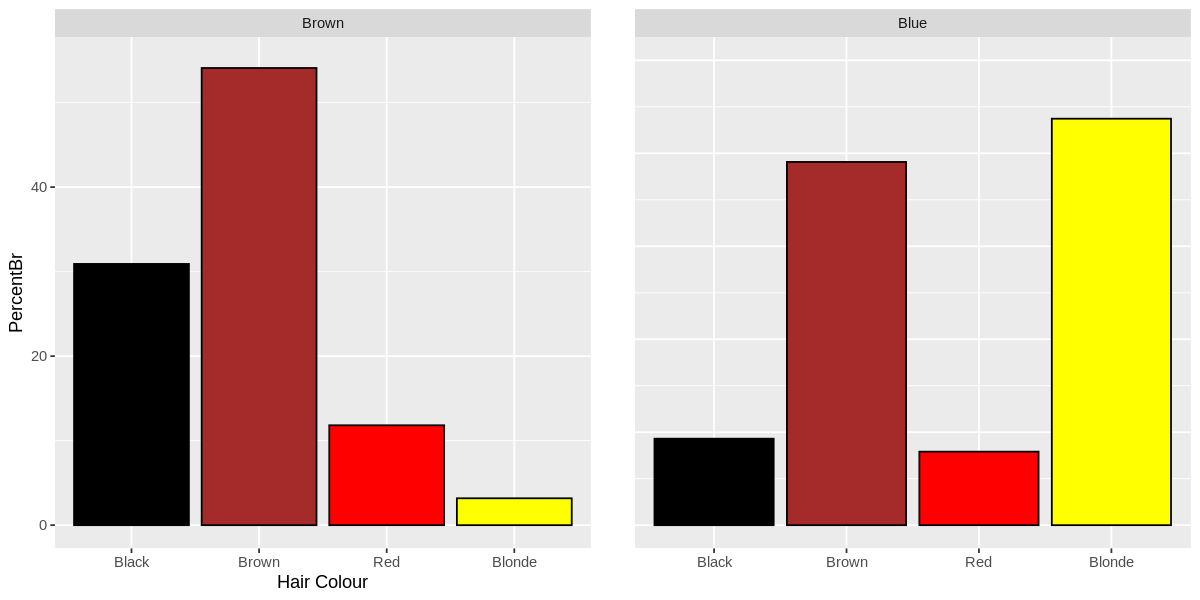

In [15]:
options(repr.plot.width = 10, repr.plot.height = 5)

plot1 = ggplot(plotdataBr, aes(x = HairBr, y = PercentBr)) +
  geom_bar(stat = "identity", colour = "black", aes(fill = HairBr), show.legend = FALSE) + 
  scale_fill_manual(values = c("black", "brown", "red", "yellow")) + 
  facet_wrap(~ EyesBr) + ylim(0,55) + xlab("Hair Colour")

plot2 = ggplot(plotdataBl, aes(x = HairBl, y = PercentBl)) +
  geom_bar(stat = "identity",colour = "black", aes(fill = HairBl), show.legend = FALSE) +
  scale_fill_manual(values = c("black", "brown", "red", "yellow")) +
  facet_wrap(~ EyesBl) + ylim(0,50) + theme(axis.text.y=element_blank(),
      axis.ticks.y=element_blank()) + xlab("") + ylab("")

grid.arrange(plot1, plot2, ncol=2)

Question 8:

In [28]:
X1 = (((20 - 53.75)^2) /53.75)
X2 = (((84 - 53.75)^2) /53.75)
X3 = (((17 - 53.75)^2) /53.75)
X4 = (((94 - 53.75)^2) / 53.75)
Xsquared3 = sum (X1 + X2 + X3 + X4)
round(Xsquared3,3)

df3 = 4 - 1
df3

pchisq(Xsquared3, df = 3, lower.tail = FALSE)

[1] 93.484

[1] 3

[1] 3.909753e-20